# Twitter Acquistion of #Montana

## Kaylee Osentowski on 12/11/2021

The goal of this project was to pull the most recent Tweets through the Twitter API that have #Montana in them. With large sport games occuring in this state, as well as forest fires. I was interested in what Twitter users were saying in regards to Montana. 

## Acquiring Data from Twitter

The first step is to actually pull the data from Twitter. Using the Twitter API I was able to search "#Montana" for the past 7 days. I then pulled the user, date tweeted, and the body of the tweet. 

In [278]:
#Imports. And setting the API keys and tokens from Twitter Developer App
import datetime
import tweepy
import twitter 
import numpy as np
import pprint
import collections
import seaborn as sns


api_key = 'xgpE9fl3gdo4Mc8A6HgtqM9II'
api_key_secret = 'yPLazQ5xQHfBHQ9D4pt2Eu5HCszhg5SAfWfYVJBWhVk5UnlHmA'
access_token = '2389805527-0mIXhjsoPARPAL37md5ginO6KAOjN9IwydE3RrX'
access_token_secret = 'Je5Usrh9dmNdxqdvGi29LJPrwMoVzpfSk4fviOucCv0r1'

In [2]:
# Authenticate the Tweepy API
auth = tweepy.OAuthHandler(api_key,api_key_secret)
auth.set_access_token(access_token, access_token_secret)
api = tweepy.API(auth,wait_on_rate_limit=True)

In [53]:
# Note: the search API only goes back 7 days
date_start = datetime.date.today()
date_end = date_start - datetime.timedelta(days=2)

search_words = f'#Montana since:{date_end} until:{date_start} -filter:retweets'

 
for idx, item in enumerate(tweepy.Cursor(api.search_tweets, 
                                         q = search_words,
                                         since= date_end,
                                         tweet_mode='extended',# tweet_mode is defaulted to short, which only holds the first 140 characters of a Tweet.
                                         lang='en').items()):
    
    # Gathering screen name, date/time, tweet text.
    print(item.user.screen_name)
    print(item.created_at)
    print(item.full_text)
    print('-'*40)
    
    if idx == 1000:
        break
    

SyntaxError: unexpected EOF while parsing (<ipython-input-53-e9ea24196151>, line 23)

In [51]:
search_words = '#Montana -filter:retweets'


tweets_all = tweepy.Cursor(api.search_tweets,
                   tweet_mode='extended',
                   q=search_words,
                   lang='en').items()

# Put all the Tweet objects for a single Tweet into a tuple, and put all those into a list
tweets = [(tweet.full_text,tweet.created_at,tweet.user.screen_name) for tweet in tweets_all]

In [142]:
#building a dataframe of the tweets
df = pd.DataFrame(tweets) 
    
# saving the dataframe 
df.to_csv('MontanaTwitter.csv',header=["Tweet", "Created", "User"],index=False)

In [144]:
#checking column names and the first 5 records
df.columns = ['Tweet', 'Created', 'User']
df.head(5)

,Tweet,Created,User
0,Rupert Murdoch buys sprawling ranch in Beaverh...,2021-12-10 21:08:45+00:00,gkearney
1,Help support this young student (Missoula Zoot...,2021-12-10 21:06:00+00:00,MontanaBasque
2,ActivArmor is being featured at BSATSMC Januar...,2021-12-10 20:58:48+00:00,ActivArmor
3,"100 yrs after #bison nearly disappeared, 5,400...",2021-12-10 20:57:04+00:00,COAnimalProtect
4,"""Spreading The Good News About CUs!""\n#creditu...",2021-12-10 20:26:30+00:00,CUEvangelist


# Analyze

The next step is to actually use this data I have pulled. The first step is to read in the csv and read the "unclean" basic text statistics

In [56]:
#Opening CSV
MT = open("MontanaTwitter.csv",'r',  encoding="UTF-8").read()

In [170]:
#Using the unclean data to pull statistics:
print(f"#Montana is {len(MT)} tokens long.")
print(f"#Montana has {len(set(MT))} unique tokens.")
print(f"#Montana lexical diversity is {len(set(MT))/len(MT):.3f}.")
# Build a vector of token length
MT_len = [len(w) for w in MT]
print(f"#Montana average token length is {np.mean(MT_len):.2f}.")


print("")
print("All statistics are calculated BEFORE cleaning.")

#Montana is 265493 tokens long.
#Montana has 331 unique tokens.
#Montana lexical diversity is 0.001.
#Montana average token length is 1.00.

All statistics are calculated BEFORE cleaning.


The next step is to clean the data:

In [283]:
#More inputs
from nltk.corpus import stopwords
from string import punctuation
from collections import Counter
from nltk.tokenize import sent_tokenize, word_tokenize
import nltk
import numpy as np

sw = stopwords.words('english')

def get_patterns(text)  :
    """
        This function takes text as an input and returns a dictionary of statistics,
        after cleaning the text. 
    
    """

    # tokenization and normalization here, including lowercase, only alpha characters, and no English stop words. 
    
    clean = [w for w in text.split()]
    clean = [w.lower() for w in clean]
    clean = [w for w in clean if w.isalpha()]
    clean = [w for w in clean if w not in sw]

    # Calculating statistics
    
    total_tokens= len(clean)
    unique_tokens= len(set(clean))
    token_len = [len(w) for w in clean]
    avg_token_len= np.mean(token_len)
    lex_diversity= len(set(clean))/len(clean)
    fd = nltk.FreqDist(clean)
    top_10= fd.most_common(10)
 
    # dictionary. 
    results = {'tokens':total_tokens,
               'unique_tokens':unique_tokens,
               'avg_token_length':avg_token_len,
               'lexical_diversity':lex_diversity,
               'top_10':top_10}

    return(results)

In [179]:
# Saving the function usage from above to a results object
m_results = get_patterns(MT)

In [180]:
#reading the results
m_results

{'tokens': 8683,
 'unique_tokens': 3492,
 'avg_token_length': 5.909938961188529,
 'lexical_diversity': 0.4021651502936773,
 'top_10': [('montana', 131),
  ('new', 62),
  ('get', 56),
  ('via', 56),
  ('like', 46),
  ('snow', 42),
  ('national', 41),
  ('total', 40),
  ('one', 39),
  ('cases', 39)]}

Unclean results as a reference: 
    
* #Montana is 265493 tokens long.
* #Montana has 331 unique tokens.
* #Montana lexical diversity is 0.001.
* #Montana average token length is 1.00.

When the data is clean the tokens massively decrease but the number of unique tokens increases. Lexcial diversity is increased in the clean version as is the average token length (from 1 to about 6)

Let's do more!

In [185]:
#Creating an data frame
data = pd.read_csv('MontanaTwitter.csv')  

In [231]:
# turning the body of the tweet data to a single string
tweets = data["Tweet"].to_string()

In [292]:
#splitting the tweets
words = tweets.split()

In [293]:
#Making a frequency distribution for clean words
sw = nltk.corpus.stopwords.words("english") 

fd2 = nltk.FreqDist([w.lower() for w in words 
                if w.lower() not in sw
                and w.isalpha()])

In [294]:
total_words = 0 

for word, count in fd2.items() :
    total_words += count
    
print(total_words)

for word,count  in fd2.most_common(20) :
    print(f"{word} : {count} : {count/total_words}")

2991
montana : 69 : 0.023069207622868605
snow : 24 : 0.00802407221664995
new : 23 : 0.007689735874289535
last : 20 : 0.006686726847208292
national : 19 : 0.006352390504847877
like : 18 : 0.006018054162487462
one : 17 : 0.0056837178201270475
winter : 17 : 0.0056837178201270475
yellowstone : 16 : 0.005349381477766633
great : 16 : 0.005349381477766633
love : 15 : 0.0050150451354062184
states : 13 : 0.0043463724506853894
day : 13 : 0.0043463724506853894
fire : 13 : 0.0043463724506853894
today : 12 : 0.004012036108324975
round : 12 : 0.004012036108324975
report : 12 : 0.004012036108324975
best : 12 : 0.004012036108324975
western : 12 : 0.004012036108324975
park : 12 : 0.004012036108324975


When the data is clean the most common word is Montana which makes sense. Most people tweet about something and use the hashtag to find other people who are interested in the subject. The words that stuck out to me are "snow", "winter", and "fire". These are the things in my head this week about Montana

Here is a pretty way to show the most common words:

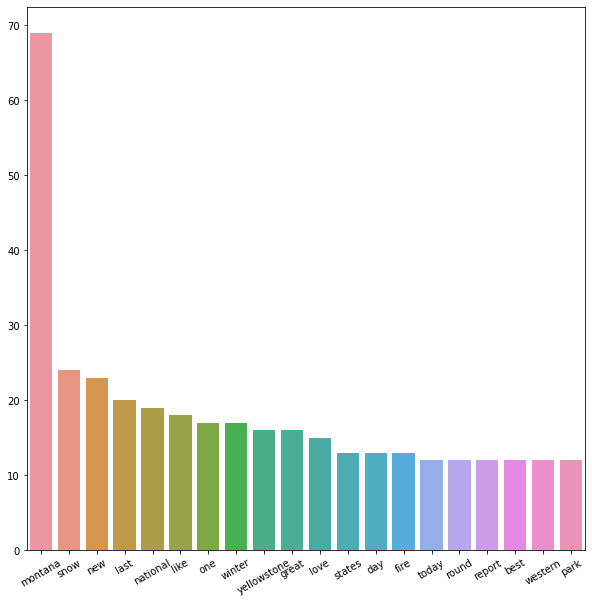

In [366]:
## Creating FreqDist, keeping the 20 most common tokens
all_fdist = nltk.FreqDist(fd2).most_common(20)

## Conversion to Pandas 
all_fdist = pd.Series(dict(all_fdist))

## Setting figure, ax into variables
fig, ax = plt.subplots(figsize=(10,10))

## Seaborn plotting using Pandas attributes + xtick rotation for ease of viewing
all_plot = sns.barplot(x=all_fdist.index, y=all_fdist.values, ax=ax)
plt.xticks(rotation=30);

Now we get fancy, lets build a word cloud about #Montana! Thanks Google for these ideas!

In [254]:
#Even more imports
from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

import matplotlib.pyplot as plt

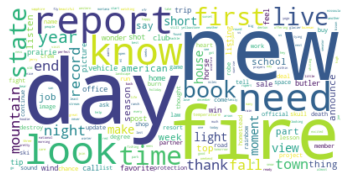

In [258]:
#Making the word cloud from our previous freqdist
wordcloud2 = WordCloud(background_color="white").generate(' '.join(fd2))
plt.figure()
plt.imshow(wordcloud2, interpolation="bilinear")
plt.axis("off")
plt.show()

# Bigrams

If you are bad at something, keep doing it. That's my motto. And that is why I explore bigrams in this next section of my Twitter #Montana analysis. 

In [267]:
#Making bigrams with the nltk function of our clean words
ss_bigrams = nltk.ngrams(fd2,2)

In [268]:
#Displaying the pairs
for idx, pair in enumerate(ss_bigrams) :
    print(pair)
    if idx > 20 :
        break

('montana', 'snow')
('snow', 'new')
('new', 'last')
('last', 'national')
('national', 'like')
('like', 'one')
('one', 'winter')
('winter', 'yellowstone')
('yellowstone', 'great')
('great', 'love')
('love', 'states')
('states', 'day')
('day', 'fire')
('fire', 'today')
('today', 'round')
('round', 'report')
('report', 'best')
('best', 'western')
('western', 'park')
('park', 'happy')
('happy', 'big')
('big', 'look')


Now we can write random tweets about Montana!

In [297]:
def generate_bigram_text(text,length=10,start=None) :
    
    uni_fd = nltk.FreqDist(text)

    if not start :
        # Select a starting point here. 
        words = []
        for i in text:
            if i.isalpha():
                words.append(i)
        start = random.choice(words)
        
    else :
        if start not in uni_fd :
            print(f"The starting word, {start}, isn't in the text!")
            return("")
    
    # here we'll need the frequency distribution for the bigrams   
    # JOHN! This is where I got confused... I thought the line above was what needed to happen right there like you were giving an instruction. 
    
    results = [] # the results of your text generator
    
    results.append(start)
    
    bigram_list = list(nltk.bigrams(fd2))
    
    deftdict = collections.defaultdict(list)
    
    for key, value in bigram_list:
        deftdict[key].append(value)
        
    key_list = list(deftdict.keys())
    value_list = list(deftdict.values())
    
    # Count is to ensure only 10 words are in the loop
    count = 0
    
    while count < length - 1:
        position = key_list.index(start)
        word = random.choice(value_list[position])
        results.append(word)
        start = word
        count += 1

    
    # here you'll build up results by randomly selecting
    # bigrams that "chain" on to the last word in results
    
    
    return(" ".join(results))

Here are some sample tweets. They are quite funny! 

In [364]:
generate_bigram_text(fd2)

'rainbows shop thursday insure warehouse saw blog greatest silversmith yonder'

In [363]:
generate_bigram_text(fd2) #My fav

'office lease secret bartenders nihilist tester stolen stole questions 𝙒𝙄𝙇𝘿'

In [365]:
generate_bigram_text(fd2)

'airlines along black american school true early lives wild use'

# Conclusion

I'm greatly looking forward to using this code to pull data about the businesses I am close to and work for. I will use the hashtags and key words common to the businesses here in Great Falls, MT and can pull what people are talking about and in what orders. This data can be used to see what is effective in marketng and what is not. I also love the idea of just random tweets to see how popular they get because they are hitting the common words.